In [1]:
import pandas as pd 
df = pd.read_csv('../../Datasets/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [3]:
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [4]:
# Splitting into the train and test sets
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)

In [5]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [6]:
y_pred = regressor.predict(X_test)


<Axes: xlabel='X', ylabel='y_actual'>

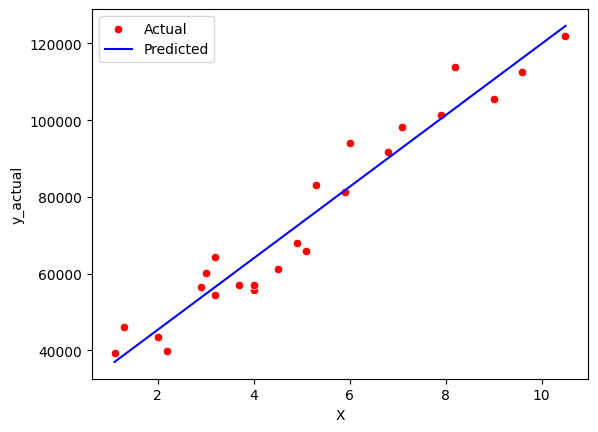

In [7]:
#Visualising Training set results
df_train = pd.DataFrame({
    'X': X_train.flatten(),
    'y_actual': y_train,
    'y_predicted': regressor.predict(X_train)
})
import seaborn as sns
sns.scatterplot(x='X', y='y_actual', data=df_train, color='red', label='Actual')
sns.lineplot(x='X', y='y_predicted', data=df_train, color='blue', label='Predicted')

<Axes: xlabel='X', ylabel='y'>

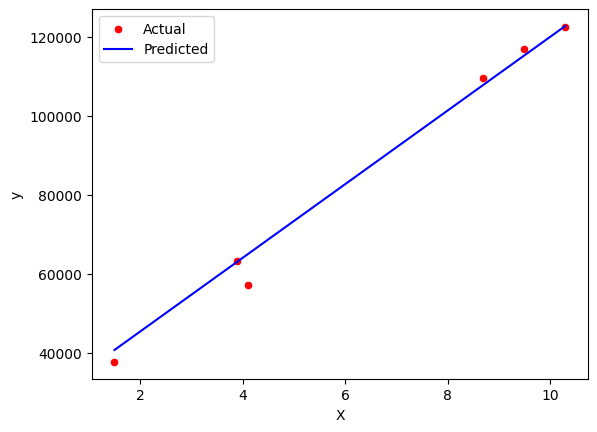

In [8]:
# Visualising Test set results 
df_test = pd.DataFrame({'X':X_test.flatten() , 'y' : y_test , 'y_pred' : y_pred})

sns.scatterplot(data=df_test , x = 'X' , y= 'y' , color = 'red' , label= 'Actual')
sns.lineplot(data=df_test , x='X' , y='y_pred' , color = 'blue' , label='Predicted')

In [9]:
print(regressor.predict([[12]]))

[138531.00067138]


In [10]:
print(regressor.coef_)
print(regressor.intercept_)

[9312.57512673]
26780.09915062818


In [23]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score 
import numpy as np
y_pred = (regressor.predict(np.array(X_test)))
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , regressor.predict(X_test))
print(f'Mean Absolute Error {mae:.2f}')
print(f'Mean Squared Error {mse:.2f}')
print(f'Root Mean Squared Error {rmse:.2f}')
print(f'R Square {r2:.4f}')

Mean Absolute Error 2446.17
Mean Squared Error 12823412.30
Root Mean Squared Error 3580.98
R Square 0.9882
